# **Project #16 - Health AI 5**

# **Group 17**

# Chirayu Tripathi, Sakshi Pandey, Shikhar Panwar, Pranav Gautam, Vishrut Mehta

# **Summary**
--------------
### Project Summary

**Project description**
1. Contextualization:
In the evolving landscape of data-driven decision-making, the ability to effectively analyze and interpret complex datasets has become paramount. This project situates itself within this context, aiming to harness advanced data processing and augmentation techniques to glean deeper insights from hematological data. The project's focus is on addressing common challenges encountered in medical data analysis, including class imbalance and the need for robust model training.

2. Problem:
The central problem tackled in this project is the effective analysis and prediction using a hematological dataset. Specifically, the project confronts issues such as class imbalance and the limitations of conventional modeling techniques when dealing with complex, real-world medical data. The goal is to enhance the predictability and reliability of the models used for such analyses.

3. Proposed Approach:
To address these challenges, the project adopted a multi-faceted approach involving exploratory data analysis, preprocessing, and advanced data augmentation techniques. Initial steps included descriptive statistical analysis, handling missing values, and normalization of the data. Subsequently, to address class imbalance and enhance the dataset, methods like SMOTE-NC and Variational Auto Encoder (VAE) based sampling were employed.

4. Impact:
The application of these sophisticated data augmentation techniques significantly improved the performance of predictive models. By creating a more balanced and representative dataset, the project was able to enhance the model's accuracy and generalizability. This, in turn, could potentially lead to more reliable medical analyses and decision-making processes.

**Objective**
The objective of the project was twofold: firstly, to manage and preprocess a complex hematological dataset effectively, and secondly, to improve the performance of predictive models used for analyzing such data. This was achieved by addressing specific challenges like class imbalance and the need for a more representative dataset, thereby enhancing the model's ability to generalize to new, unseen data.

**Dataset**
The dataset at the core of this project is a comprehensive collection of hematological measurements. It includes 3000 samples with 11 features each, encompassing various blood parameters like Hematocrit, Hemoglobin, and Erythrocyte counts, along with demographic data like age and sex. Notably, the dataset was subjected to preprocessing steps such as Min-Max normalization and missing value analysis, although no missing values were found. The initial exploration of the dataset provided vital insights into its structure and inherent patterns.

**Approach**
The approach was methodical and data-centric, starting with a thorough exploratory analysis followed by preprocessing steps like normalization and duplicate removal. To tackle class imbalance, SMOTE-NC was used, increasing the dataset size and enhancing class representation. Further, VAE-based sampling methods were employed to generate new data points, capturing the underlying distributions of the classes more effectively. These augmentation techniques not only balanced the dataset but also introduced variability, making the models more robust and less prone to overfitting.

**Conclusions**
The project's results were promising, showcasing a notable improvement in model performance. The use of SMOTE-NC improved model accuracy by 3%, while the VAE-based sampling methods led to an additional 10% improvement over SMOTE-NC and a 13% improvement compared to no augmentation. These results underscore the effectiveness of the chosen data augmentation techniques in enhancing the predictability and reliability of models dealing with complex medical datasets. The project demonstrates the potential of advanced data processing techniques in transforming the landscape of medical data analysis, paving the way for more accurate and reliable medical predictions and decisions.



--------------


Demo Video Link: https://youtu.be/GvqRZv7iH84

# I. Preparation

Chapters are consisted consiering the expected orders of the processes. However, depending on your project, you may change the orders with why the corresponding orders are changed.

**Import all necessary libraries here:** You do not have to get this right or complete from the first shot, you can include all you feel will be relevant but you can add more as you need them.

**Connect to your Google Account:** You are required to use Google Colab. Hence the first thing you will do is connect to your account and mount your landing Google Drive folder.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# once deep_tabular_augmentation installation is done, we need to manually update the commom.py file within the deep_tabular_augmentation directory to change "from collections import Iterable"
# to "from from collections.abc import Iterable"
!pip install deep_tabular_augmentation
!pip install mlprep-ls
!pip install 'aif360[all]'
!pip install shap

  Preparing metadata (setup.py) ... done
  Created wheel for deep_tabular_augmentation: filename=deep_tabular_augmentation-0.5.3-py3-none-any.whl size=7912 sha256=1d98055879af56f61376455bfe5d94362b923444124b8c026acca75c7482afe4
  Stored in directory: /root/.cache/pip/wheels/38/f0/a1/8f6374b13b851c6fd151c4e5fd7bc0fb2b45f41acc9ecc9f59
Successfully built deep_tabular_augmentation
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.1/214.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━

### **Importing the necessary libraries and overview of the dataset**

In [ ]:
# Example basic libraries to import
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization

# Example machine learning libraries to import
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.linear_model import LinearRegression  # For linear regression modeling
from sklearn.tree import DecisionTreeClassifier  # For decision tree classification
from sklearn.ensemble import RandomForestClassifier  # For random forest classification
from sklearn.metrics import accuracy_score, mean_squared_error  # For model evaluation

import pandas as pd
import numpy as np
import random
import os
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# from sklearn.metrics.pairwise import manhattan_distances
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.model_selection import GridSearchCV, GroupKFold, cross_val_score, StratifiedGroupKFold
from sklearn.pipeline import Pipeline
import warnings
import joblib
from sklearn.model_selection import cross_val_predict, cross_validate
from datetime import datetime
from xgboost import XGBClassifier,XGBRegressor
from sklearn.model_selection import train_test_split
import shap
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import DisparateImpactRemover
from torch import optim
from functools import partial
import deep_tabular_augmentation as dta #/usr/local/lib/python3.10/dist-packages/deep_tabular_augmentation/common.py
import mlprepare as mlp
import torch


### **Loading the data**
To load your dataset, you need to first upload the dataset to your Google drive. It is a good practice to first create a folder in your drive dedicated to datasets. For instance '/content/drive/Datasets/your-project-dataset.csv'

Create such a folder, then upload your dataset to it.

Then, load the dataset using read_csv() into a datadrame.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset_project5.csv')

In [ ]:
# Get descriptive statistics
numerical_stats = df.describe()

# Count missing values for every column
missing_values = df.isnull().sum()

# Count total missing values in the entire DataFrame
total_missing = missing_values.sum()


print("Descriptive Statistics:")
print(numerical_stats)
print("\nMissing Values:")
print(missing_values)
print(f"Total Missing Values: {total_missing}")

Descriptive Statistics:
       HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE    LEUCOCYTE  THROMBOCYTE  \
count  3000.000000   3000.000000  3000.000000  3000.000000  3000.000000   
mean     39.249800     13.090467     4.734303     8.121800   256.353333   
std       5.614139      2.004291     0.724817     4.564886   110.472352   
min      14.600000      3.800000     1.930000     1.100000    10.000000   
25%      35.800000     11.900000     4.290000     5.300000   187.000000   
50%      39.500000     13.200000     4.740000     7.100000   257.000000   
75%      43.300000     14.500000     5.200000     9.700000   322.000000   
max      57.000000     18.800000     7.860000    41.100000   830.000000   

               MCH         MCHC          MCV          AGE  
count  3000.000000  3000.000000  3000.000000  3000.000000  
mean     27.774800    33.314867    83.279267    35.061000  
std       2.650355     1.213204     6.544982    15.687617  
min      14.900000    26.000000    54.000000     1.000000  


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('/content/drive/MyDrive/dataset_project5.csv')

# Remove duplicate rows
columns_to_check = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE']
df_no_duplicates = df.drop_duplicates(subset=columns_to_check)


columns_to_normalize = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply the MinMaxScaler to the selected columns in the df without duplicates
df_no_duplicates[columns_to_normalize] = scaler.fit_transform(df_no_duplicates[columns_to_normalize])

# Save the normalized df without duplicates to a new CSV file
df_no_duplicates.to_csv('normalized_data.csv', index=False)

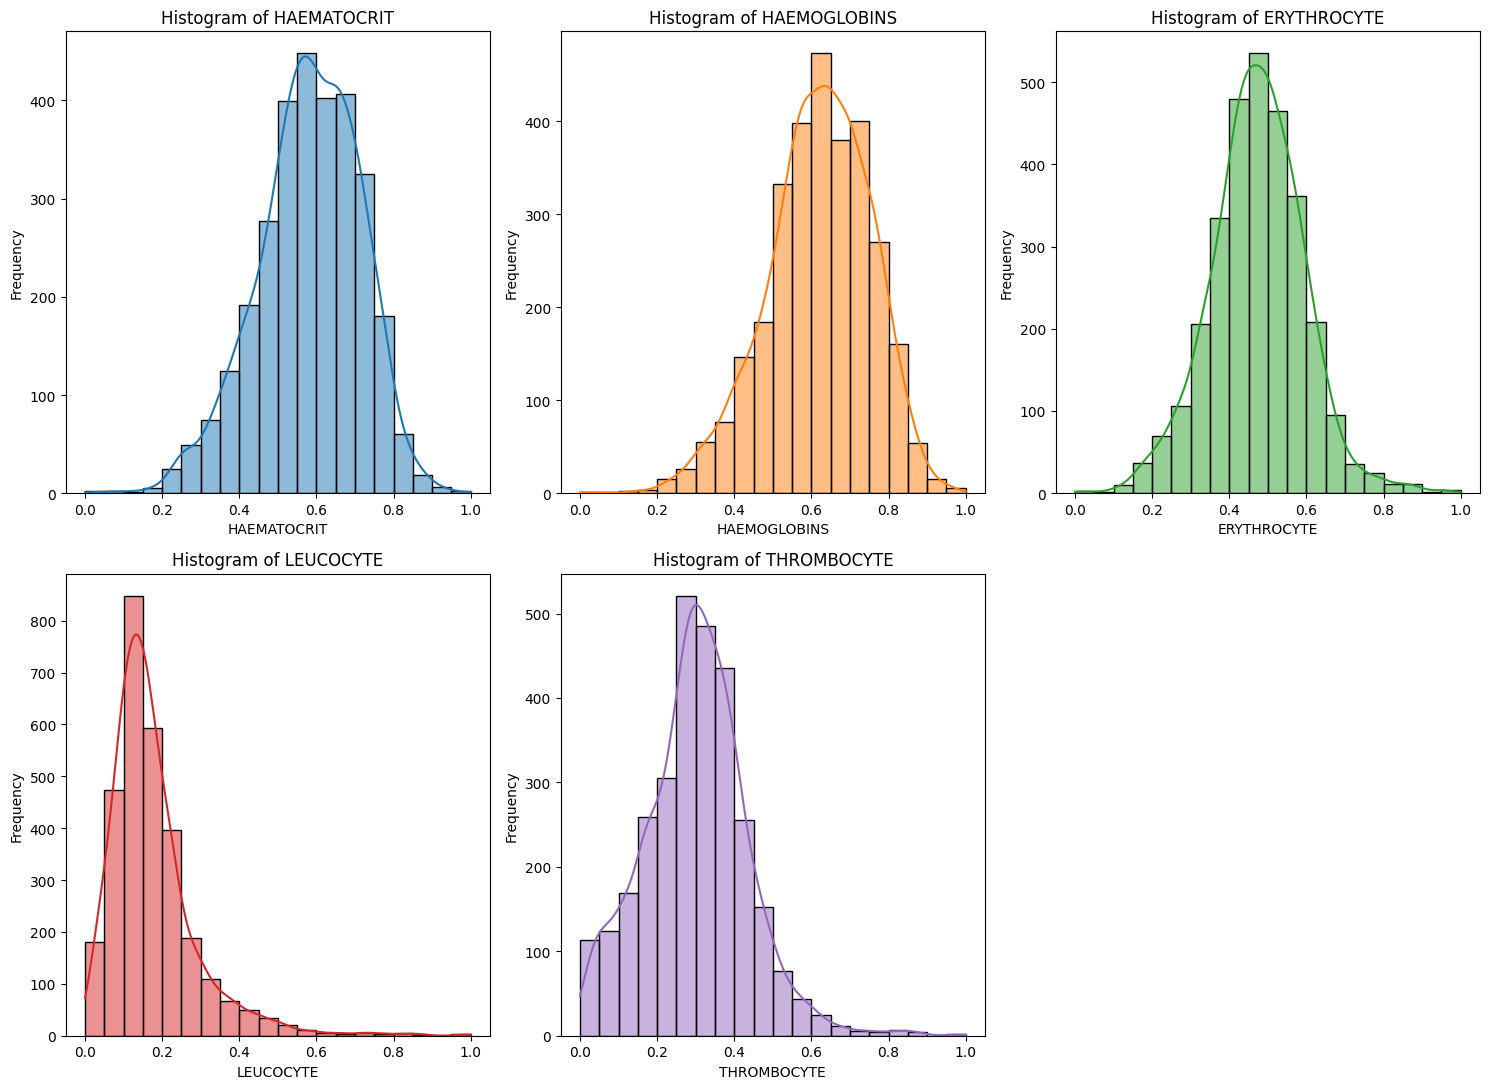

In [ ]:
#visualize the numerical data columns

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('normalized_data.csv')

numerical_columns = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE']


numbins = 20

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

plt.figure(figsize=(15, 11))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.title(f'Histogram of {column}')
    sns.histplot(df[column], bins=numbins, kde=True, color=colors[i-1])
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### **Exploratory Data Analysis - Understand and connect with the Dataset**





**OBSERVATIONS**


---


**Descriptive Statistics:**
The dataset contains 3,000 entries.

Key hematological parameters such as Hematocrit, Hemoglobin, Erythrocyte, Leucocyte, and Thrombocyte are measured.

Hematocrit values range from 14.6 to 57.0, with a mean of 39.25.

Hemoglobin levels vary between 3.8 and 18.8, with an average of 13.09.

Erythrocyte count spans from 1.93 to 7.86, with a mean of 4.73.

Leucocyte count shows a wide range from 1.1 to 41.1, averaging at 8.12.

Thrombocyte count ranges from 10 to 830, with an average of 256.35.

Mean Corpuscular Hemoglobin (MCH), Mean Corpuscular Hemoglobin Concentration (MCHC), and Mean Corpuscular Volume (MCV) are also included, with their respective ranges and averages.

The age of individuals in the dataset ranges from 1 to 60 years, with an average age of around 35 years.

**Missing Values:**
There are no missing values in the dataset, indicating a complete dataset without gaps in data entry.

**Data Integrity:**
The dataset appears to be well-structured and comprehensive for hematological analysis, given the range and completeness of the data.
This dataset seems well-suited for in-depth analysis of hematological parameters, particularly for understanding variations across different ages and sexes.



# IV. Tasks to do if Data Preprocessing is Relevant to your Project

## **Choose Your Data Preprocessing Methods:**

Numeric values(or features) in original data can be preprocessed by the methods below. One or more methods can be selected.
1. Standardization: This method involves transforming each value by subtracting the mean and dividing by the standard deviation of the dataset, thus achieving a zero mean and unit variance, commonly termed Z-score normalization.
2. Min-Max Normalization: This method rescales each value by subtracting the minimum value and dividing by the range of the dataset, thereby transforming the data to fit within a specified range, typically 0 to 1.
3. Mean Normalization: Similar to standardization, this method adjusts values to have a zero mean by subtracting the mean and dividing by the range, without altering the standard deviation.
4. Unit Vector Normalization: This approach normalizes data by dividing each value by its vector magnitude, resulting in a dataset where each value has a unit length.

Codes in original data can be preprocessed by the below. However the encoded values should be handled separatedly comparing to numeric values.
- Encode categorical variables using methods like one-hot encoding or label encoding.

Others are considered as below.
- Handle missing data by imputing or removing null values.

Choose appropriate preprocessing methods considering the type of the values. List the methods that you will use providing a short derscription of each.

**METHODS**


---


**Descriptive Statistics:**

*Purpose:* To get a basic understanding of the dataset.

*Description:* This involves computing summary statistics like mean, median, standard deviation, min, and max values for each numerical column. It helps in getting a quick overview of the distribution of data and identifying any potential anomalies or outliers.

**Missing Value Handling:**

*Purpose:* To check and address any missing data in the dataset.

*Description:* This step involves counting the number of missing values in each column and the total missing values across the dataset. Depending on the findings, we would have decided on methods to handle missing values.However in our dataset, this was only a checking step as there were no missing values.

**Duplicate Removal:**

*Purpose:* To ensure the uniqueness of each data entry.

*Description:* This method involves removing duplicate rows from the dataset to prevent skewing the data analysis or model training. In our dataset, we identified specific columns to check for duplicates and removed any rows where these column values were repeated. There were, however, no duplicates found.


**Min-Max Normalization:**

Purpose: *italicized text* To rescale numerical features to a standard range.

*Description: *This method transforms our dataset to fit within a specified range, typically [0, 1]. It is done by subtracting the minimum value of each feature and dividing by the range (max - min). This normalization is particularly useful for algorithms that are sensitive to the scale of the data, like gradient descent-based methods, and helps in speeding up the convergence.

**Data Visualization (Histograms):**

*Purpose:* To visually explore the distribution of data in each numerical column.

*Description:* Histograms provide a graphical representation of the frequency distribution of numerical data. By plotting histograms, we can understand the skewness, identify outliers, and get a sense of the distribution shape for each variable. This is crucial for making informed decisions about further data preprocessing and analysis.
These preprocessing steps are fundamental for exploratory data analysis. Each step plays a crucial role in understanding, cleaning, and transforming the data into a format that can be effectively used for deriving insights or predictions.


## Apply your Data Preprocessing Methods:

Implement the chosen preprocessing method on the original data.

In [ ]:
# Get descriptive statistics
numerical_stats = df.describe()

# Count missing values for every column
missing_values = df.isnull().sum()

# Count total missing values in the entire DataFrame
total_missing = missing_values.sum()


print("Descriptive Statistics:")
print(numerical_stats)
print("\nMissing Values:")
print(missing_values)
print(f"Total Missing Values: {total_missing}")

In [ ]:
# drop duplicates.
# normalize the data.

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('/content/drive/MyDrive/dataset_project5.csv')

# Remove duplicate rows
columns_to_check = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE']
df_no_duplicates = df.drop_duplicates(subset=columns_to_check)


columns_to_normalize = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply the MinMaxScaler to the selected columns in the df without duplicates
df_no_duplicates[columns_to_normalize] = scaler.fit_transform(df_no_duplicates[columns_to_normalize])

# Save the normalized df without duplicates to a new CSV file
df_no_duplicates.to_csv('normalized_data.csv', index=False)

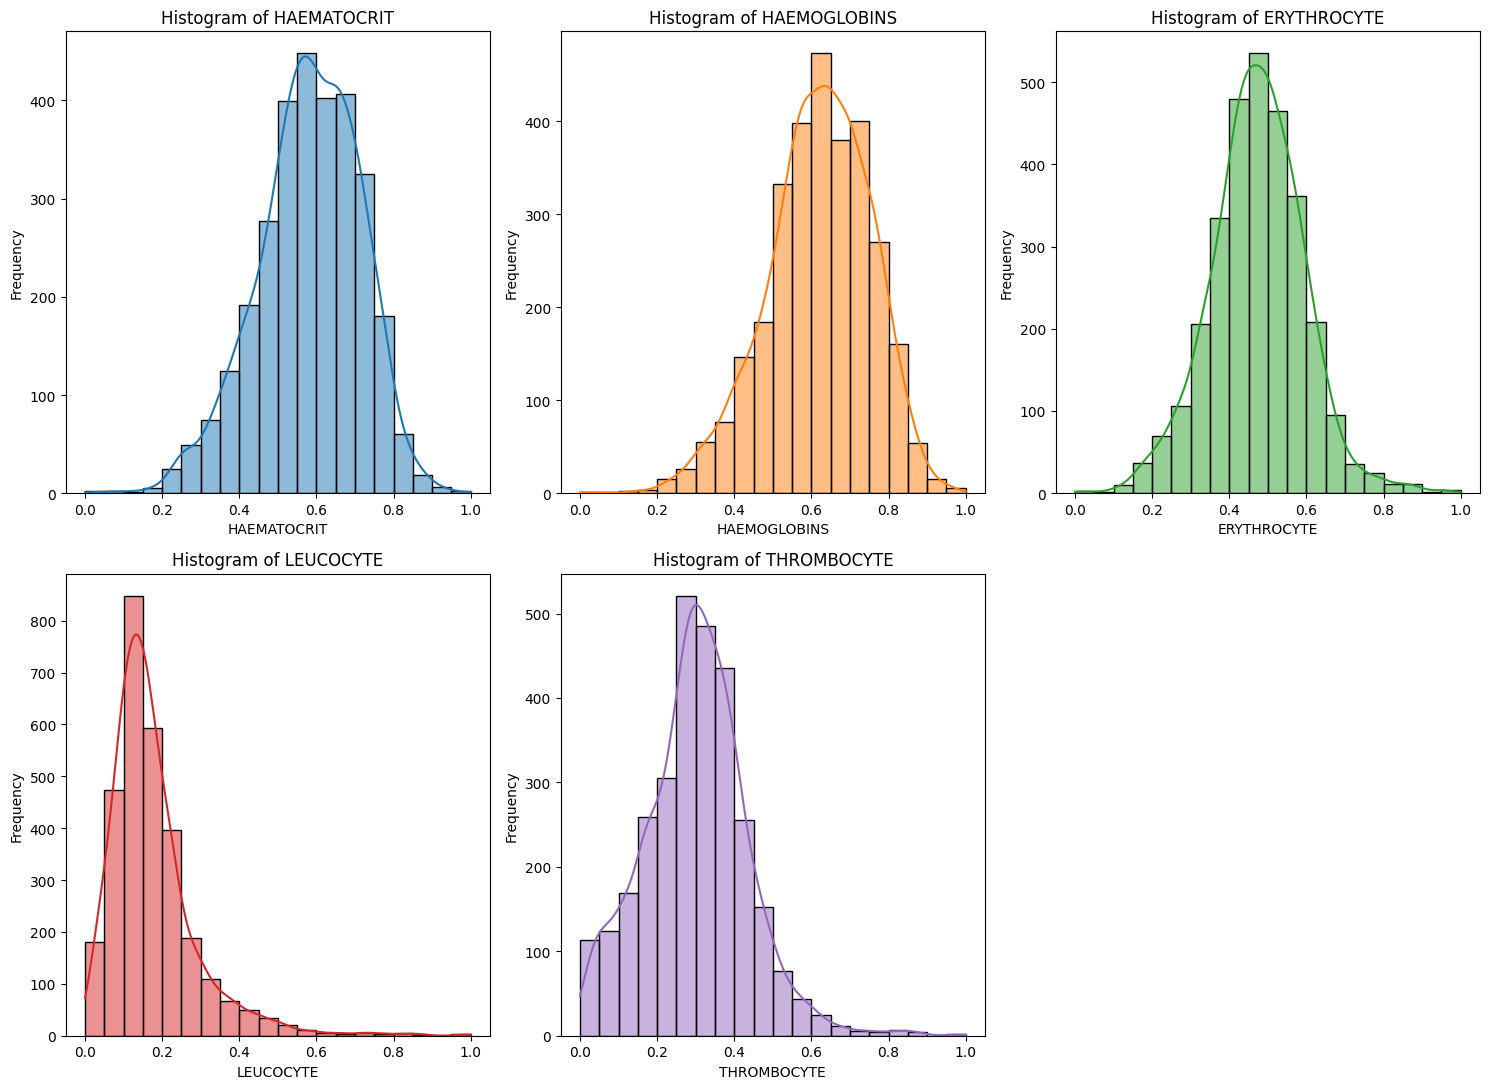

In [ ]:
#visualize the numerical data columns

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('normalized_data.csv')

numerical_columns = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE']


numbins = 20

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

plt.figure(figsize=(15, 11))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.title(f'Histogram of {column}')
    sns.histplot(df[column], bins=numbins, kde=True, color=colors[i-1])
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Show your Preprocssed Data:

Show your preprocessed data comparing to the original data

No duplicated or missing fields were found in the dataset. Min-Max normalization has transformed the numerical features into a uniform scale ranging from 0 to 1, facilitating better comparability and typically improving the performance of machine learning algorithms. The data is now normalized to have mean of 0 and std of 1. The categorical variables ('SEX' and 'SOURCE') are not affected by this normalization process.

In [ ]:
df_preprocessed = pd.read_csv('normalized_data.csv')

In [ ]:
df_preprocessed

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,0.483491,0.533333,0.458685,0.1300,0.365854,0.458515,0.666667,0.425743,0.0,F,out
1,0.681604,0.733333,0.583474,0.2900,0.395122,0.550218,0.701754,0.528713,0.0,F,out
2,0.445755,0.500000,0.473862,0.3025,0.359756,0.388646,0.675439,0.330693,0.0,F,out
3,0.577830,0.660000,0.514334,0.2350,0.434146,0.550218,0.789474,0.485149,0.0,F,out
4,0.384434,0.406667,0.387858,0.5250,0.393902,0.371179,0.526316,0.376238,0.0,M,out
...,...,...,...,...,...,...,...,...,...,...,...
2995,0.761792,0.846667,0.618887,0.1775,0.345122,0.637555,0.807018,0.590099,1.0,M,out
2996,0.740566,0.746667,0.549747,0.1450,0.263415,0.611354,0.578947,0.685149,1.0,M,out
2997,0.497642,0.533333,0.330523,0.2125,0.373171,0.672489,0.622807,0.748515,1.0,M,out
2998,0.634434,0.626667,0.490725,0.2075,0.343902,0.541485,0.508772,0.627723,1.0,M,out


In [ ]:
df_original = pd.read_csv('/content/drive/MyDrive/dataset_project5.csv')

In [ ]:
df_original

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out
...,...,...,...,...,...,...,...,...,...,...,...
2995,46.9,16.5,5.60,8.2,293,29.5,35.2,83.8,60,M,out
2996,46.0,15.0,5.19,6.9,226,28.9,32.6,88.6,60,M,out
2997,35.7,11.8,3.89,9.6,316,30.3,33.1,91.8,60,M,out
2998,41.5,13.2,4.84,9.4,292,27.3,31.8,85.7,60,M,out


# V. Preparation of Learning Data

## Split the Data:
Divide the dataset into learning, training and testing datasets.

In [ ]:
df = pd.read_csv('/content/normalized_data.csv')
df['SEX'] = df['SEX'].apply(lambda x: 1 if x == 'M' else 0)
df['SOURCE'] = df['SOURCE'].apply(lambda x: 1 if x == 'out' else 0)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[['HAEMATOCRIT','HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE','THROMBOCYTE', 'MCH','MCHC',	'MCV'	,'AGE', 'SEX']], df['SOURCE'], test_size = .25)

# VI. Tasks to do if Data Augmentation is Relevant to your Project

## Select your Data Augmentation Methods:

There are the diverse kinds of Data Augmentation methods. The below are some methods that you might utilize.
1. Feature Crossing: This method combines multiple features to form a new composite feature, facilitating the capture of complex interactions between variables that may be predictive of outcomes.
2. Polynomial Features: This method entails generating additional features by elevating existing features to various powers and creating interaction terms, enhancing the model's ability to discern intricate patterns in the data.
3. Sample Interpolation: This method produces new data points by interpolating between existing samples, thus enriching the dataset with a broader spectrum of variations and nuances.
4. Adding Noise: This process introduces stochastic variations to the data, aiding in the development of more resilient models by reducing the likelihood of overfitting to the training dataset.
5. Random Sampling with Replacement: This method involves creating augmented datasets by randomly selecting and potentially reselecting samples from the original dataset, thereby amplifying the heterogeneity and representativeness of the training data.

Choose appropriate Data Augmentation methods based on the nature of the data and the problem at hand.
List the methods that you will use providing a short derscription of each.

**SMOTE-NC (Synthetic Minority Over-sampling Technique for Nominal and Continuous variables)**

**Purpose**: To balance the dataset by generating synthetic samples, particularly useful when dealing with imbalanced classes.

**Description**: This method is an extension of the standard SMOTE, designed to handle a mix of nominal (categorical) and continuous features. It synthesizes new samples for the minority class by interpolating between existing minority samples for continuous features, while using the most frequent category for nominal features. This approach enhances the representation of underrepresented classes in the dataset, potentially leading to better model performance, especially in classification tasks.



**Sampling Without Noise**

In this augmentation technique we utilize the Variational Auto Encoder to identify the underlying distribution of both the prediction classes (In and Out) separately after which we sample some data points out of this distribution and create a new dataset.

**Purpose:** To generate new, diverse samples based on the underlying distribution of the data.

**Description:** This method employs a Variational Auto Encoder (VAE) to learn the distribution of the data for each class ('In' and 'Out'). After training, the VAE is used to sample new data points from these distributions. This technique helps in creating a dataset that captures the inherent variability of each class without introducing additional noise, thereby enriching the dataset and potentially improving the robustness of predictive models.

**Sampling With Noise**

In this augmentation technique we utilize the Variational Auto Encoder to identify the underlying distribution of both the prediction classes (In and Out) separately after which we sample some data points out of this distribution while also adding some noise to make our model more robust towards the unseen data.

**Purpose:** To augment the dataset with new samples that include stochastic variations.

**Description:** Similar to the previous method, this approach also uses a Variational Auto Encoder. However, in this case, after identifying the underlying distribution of each class, the method introduces random noise to the sampled data points. This process generates a dataset that not only reflects the original data’s variability but also includes additional randomness. This augmentation is particularly useful for enhancing the model's generalizability and reducing overfitting, as it trains the model to handle data with variations that might be encountered in real-world scenarios.

**Architecture of Variational Auto Encoder**

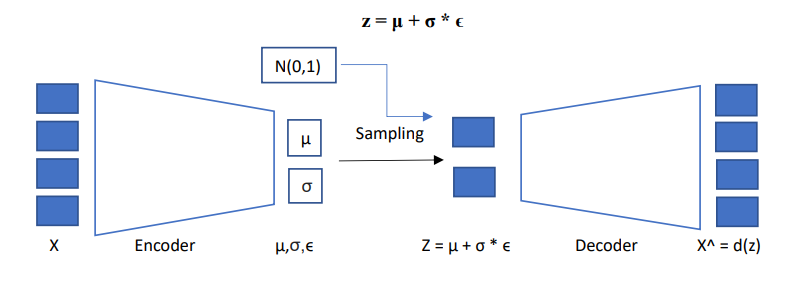

## Apply Data Augmentation Methods:

Implement the Data Augmentation methods.

In [ ]:
df['SOURCE'].value_counts()

1    1874
0    1126
Name: SOURCE, dtype: int64

In [ ]:
# Technique - 1 (Using SMOTENC)

import pandas as pd
from imblearn.over_sampling import SMOTENC

# Load your dataset
data = pd.read_csv("/content/drive/MyDrive/dataset_project5.csv")

# Encode 'SEX' column
data['SEX'] = data['SEX'].apply(lambda x: 1 if x == 'M' else 0)

# Specify the index of the categorical feature ('SEX' in this case)
categorical_indices = [9]  # Index 9 corresponds to the 'SEX' column

# Separate your features (X) and the target variable (y)
X = data.drop(columns=['SOURCE'])
y = data['SOURCE']

# Apply SMOTENC to generate synthetic samples
smotenc = SMOTENC(sampling_strategy='auto', categorical_features=categorical_indices, random_state=42)
X_resampled, y_resampled = smotenc.fit_resample(X, y)

# Create a new DataFrame from the resampled data
new_data = pd.concat([X_resampled, y_resampled], axis=1)

# Decode 'SEX' column
data['SEX'] = data['SEX'].apply(lambda x: 'M' if x == 1 else 'F')
new_data['SEX'] = new_data['SEX'].apply(lambda x: 'M' if x == 1 else 'F')

# Append the new data to the existing dataset
augmented_data = pd.concat([data, new_data[:]], ignore_index=True)

# Save the new dataset to a CSV file
# df = pd.concat([data,augmented_data],axis=0)
augmented_data.to_csv("augmented_dataset_nc.csv", index=False)

In [ ]:
# Technique - 2 (Using Sampling with and without noise)
def augment(df,target):
  device = 'cuda' if torch.cuda.is_available() else 'cpu'
  X_train, X_test, y_train, y_test = mlp.split_df(df, dep_var='SOURCE', test_size=0.3, split_mode='random')

  x_scaler = StandardScaler()

  X_train_scaled = x_scaler.fit_transform(X_train)

  X_test_scaled = x_scaler.transform(X_test)

  X_train_fraud = X_train_scaled[np.where(y_train==target)[0]]
  X_test_fraud = X_test_scaled[np.where(y_test==target)[0]]

  datasets = dta.create_datasets(X_train_fraud, y_train.values[np.where(y_train==target)], X_test_fraud, y_test.values[np.where(y_test==target)])
  data = dta.DataBunch(*dta.create_loaders(datasets, bs=1024, device=device))

  D_in = X_train_fraud.shape[1]
  VAE_arch = [50, 12, 12]
  target_name = 'SOURCE'
  target_class = target
  df_cols = list(df.columns)

  model = dta.Autoencoder(D_in, VAE_arch, latent_dim=5).to(device)
  opt = optim.Adam(model.parameters(), lr=0.01)
  loss_func = dta.customLoss()

  learn = dta.Learner(model, opt, loss_func, data, target_name, target_class, df_cols)

  run = dta.Runner(cb_funcs=[dta.LR_Find, dta.Recorder])

  run.fit(100, learn)

  sched = dta.combine_scheds([0.3, 0.7], [dta.sched_cos(0.01, 0.1), dta.sched_cos(0.1, 0.01)])


  cbfs = [partial(dta.LossTracker, show_every=50), dta.Recorder, partial(dta.ParamScheduler, 'lr', sched)]
  model = dta.Autoencoder(D_in, VAE_arch, latent_dim=20).to(device)
  opt = optim.Adam(model.parameters(), lr=0.01)
  learn = dta.Learner(model, opt, loss_func, data, target_name, target_class, df_cols)
  run = dta.Runner(cb_funcs=cbfs)
  run.fit(400, learn)

  df_fake = run.predict_df(learn, no_samples=1000, scaler=x_scaler)
  std_list = list(df[df['SOURCE']==0][df_cols].std()/10)
  df_fake_with_noise = run.predict_with_noise_df(learn, no_samples=1000, mu=0, sigma=std_list, scaler=x_scaler)
  # df_fake_with_noise.head()
  return df_fake, df_fake_with_noise

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset_project5.csv')
df['SEX'] = df['SEX'].apply(lambda x: 1 if x == 'M' else 0)
df['SOURCE'] = df['SOURCE'].apply(lambda x: 1 if x == 'out' else 0)
# training variational auto encoder and getting newly generated data from it.
df_fake_0, df_fake_with_noise_0 = augment(df, 0)

epoch: 50
train loss is: 4.7901482582092285
validation loss is: 1.4795019626617432
epoch: 100
train loss is: 1.6484171152114868
validation loss is: 1.2771100997924805
epoch: 150
train loss is: 1.3784812688827515
validation loss is: 1.2328296899795532
epoch: 200
train loss is: 1.2864429950714111
validation loss is: 1.2202953100204468
epoch: 250
train loss is: 1.2400563955307007
validation loss is: 1.2139017581939697
epoch: 300
train loss is: 1.2121505737304688
validation loss is: 1.210039496421814
epoch: 350
train loss is: 1.1934934854507446
validation loss is: 1.2074527740478516
epoch: 400
train loss is: 1.1801522970199585
validation loss is: 1.2056119441986084


In [ ]:
# training variational auto encoder and getting newly generated data from it.
df_fake_1, df_fake_with_noise_1 = augment(df, 1)

epoch: 50
train loss is: 4.319601535797119
validation loss is: 1.2296693325042725
epoch: 100
train loss is: 1.2216730117797852
validation loss is: 0.9293572902679443
epoch: 150
train loss is: 1.0578830242156982
validation loss is: 0.9278787970542908
epoch: 200
train loss is: 1.0036784410476685
validation loss is: 0.927238941192627
epoch: 250
train loss is: 0.977380096912384
validation loss is: 0.9270079731941223
epoch: 300
train loss is: 0.9602593779563904
validation loss is: 0.9268302917480469
epoch: 350
train loss is: 0.9491775631904602
validation loss is: 0.9266623258590698
epoch: 400
train loss is: 0.940941333770752
validation loss is: 0.9265474677085876


In [ ]:
df_fake_1['SEX'], df_fake_with_noise_1['SEX'] = df_fake_1['SEX'].apply(lambda x: round(x)), df_fake_with_noise_1['SEX'].apply(lambda x: round(x))
df_fake_0['SEX'], df_fake_with_noise_0['SEX'] = df_fake_0['SEX'].apply(lambda x: round(x)), df_fake_with_noise_0['SEX'].apply(lambda x: round(x))

## Show your Augmented Data:

Show your generated new data comparing to original data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset_project5.csv')
df['SEX'] = df['SEX'].apply(lambda x: 1 if x == 'M' else 0)
df['SOURCE'] = df['SOURCE'].apply(lambda x: 1 if x == 'out' else 0)
df.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,39.249800,13.090467,4.734303,8.121800,256.353333,27.774800,33.314867,83.279267,35.061000,0.510000,0.624667
std,5.614139,2.004291,0.724817,4.564886,110.472352,2.650355,1.213204,6.544982,15.687617,0.499983,0.484290
min,14.600000,3.800000,1.930000,1.100000,10.000000,14.900000,26.000000,54.000000,1.000000,0.000000,0.000000
25%,35.800000,11.900000,4.290000,5.300000,187.000000,26.600000,32.700000,80.400000,24.000000,0.000000,0.000000
50%,39.500000,13.200000,4.740000,7.100000,257.000000,28.300000,33.400000,84.400000,36.000000,1.000000,1.000000
75%,43.300000,14.500000,5.200000,9.700000,322.000000,29.500000,34.100000,87.400000,48.000000,1.000000,1.000000
max,57.000000,18.800000,7.860000,41.100000,830.000000,37.800000,37.400000,104.500000,60.000000,1.000000,1.000000


In [ ]:
# Data after SMOTE-NC
new_data.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
count,3748.000000,3748.000000,3748.000000,3748.000000,3748.000000,3748.000000,3748.000000,3748.000000,3748.000000
mean,38.908037,12.979661,4.690431,8.146612,247.483458,27.790884,33.323695,83.310417,35.545358
std,5.599284,1.994607,0.719609,4.653235,114.571778,2.576238,1.181944,6.358552,15.593749
min,14.600000,3.800000,1.930000,1.100000,10.000000,14.900000,26.000000,54.000000,1.000000
25%,35.400000,11.724087,4.244771,5.200000,168.000000,26.700000,32.700000,80.500000,25.000000
50%,39.200000,13.100000,4.690000,7.100000,251.000000,28.300000,33.400000,84.400000,36.000000
75%,42.900000,14.400000,5.152500,9.800000,318.000000,29.476046,34.100000,87.346737,49.000000
max,57.000000,18.800000,7.860000,41.100000,830.000000,37.800000,37.400000,104.500000,60.000000


In [ ]:
# Original data for class label 0
df[df['SOURCE'] == 0.0].describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
count,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.0
mean,37.541563,12.514121,4.548943,8.419716,210.713144,27.648046,33.297957,82.942274,36.547957,0.519538,0.0
std,5.854355,2.067833,0.772000,5.499211,123.979792,2.621360,1.257908,6.400749,15.894902,0.499840,0.0
min,16.700000,4.600000,2.150000,1.100000,10.000000,14.900000,26.400000,54.000000,1.000000,0.000000,0.0
25%,33.300000,11.100000,4.030000,4.700000,111.000000,26.500000,32.700000,80.225000,25.000000,0.000000,0.0
50%,38.000000,12.600000,4.570000,7.100000,205.500000,28.200000,33.400000,83.950000,38.000000,1.000000,0.0
75%,41.800000,14.000000,5.030000,10.200000,288.000000,29.400000,34.100000,87.100000,50.000000,1.000000,0.0
max,54.000000,17.900000,7.610000,41.100000,830.000000,33.200000,37.100000,98.100000,60.000000,1.000000,0.0


In [ ]:
# Data after sampling without noise for class label 0.
# standard deviation is close to 0 as there is no noise.
df_fake_0.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0
mean,37.691578,12.556738,4.573488,8.435874,211.609192,27.592972,33.282280,82.813362,36.067398,1.0,0.0
std,0.030052,0.011280,0.000551,0.087378,1.433894,0.016070,0.004731,0.033680,0.008971,0.0,0.0
min,37.597477,12.524315,4.571867,8.033860,207.398560,27.564791,33.265923,82.758568,36.038414,1.0,0.0
25%,37.669081,12.548130,4.573057,8.383973,210.465427,27.580337,33.278926,82.787371,36.060491,1.0,0.0
50%,37.688297,12.555507,4.573419,8.445603,211.510651,27.588729,33.281816,82.802765,36.067719,1.0,0.0
75%,37.712235,12.564118,4.573872,8.491009,212.569447,27.601890,33.285499,82.831158,36.073178,1.0,0.0
max,37.795452,12.598121,4.575488,8.681541,216.759949,27.665201,33.298271,82.969360,36.097458,1.0,0.0


In [ ]:
# Data after sampling with noise for class label 0.
# standard deviation is increased as we have added noise.
df_fake_with_noise_0.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,37.662089,12.555137,4.572358,8.454860,212.318633,27.604432,33.291638,82.841772,36.141786,0.595000,0.0
std,0.620590,0.207448,0.074826,0.561878,12.471202,0.257505,0.125038,0.644292,1.543714,0.491138,0.0
min,35.163205,11.853868,4.354375,6.513469,175.321506,26.768720,32.934284,80.757715,30.416181,0.000000,0.0
25%,37.267010,12.411733,4.523622,8.080136,203.689106,27.435646,33.209024,82.426987,35.207396,0.000000,0.0
50%,37.652640,12.552012,4.570830,8.465731,212.776320,27.598721,33.293315,82.850601,36.158275,1.000000,0.0
75%,38.075914,12.692385,4.623792,8.829926,221.172927,27.776133,33.374922,83.288431,37.190904,1.000000,0.0
max,39.522850,13.145649,4.790977,10.180801,251.593054,28.303622,33.660253,85.084603,40.573997,1.000000,0.0


In [ ]:
# Original data for class label 1
df[df['SOURCE'] == 1].describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
count,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.0
mean,40.276201,13.436766,4.845678,7.942796,283.776414,27.850961,33.325027,83.481750,34.167556,0.504269,1.0
std,5.203109,1.882612,0.670936,3.887929,91.125347,2.665422,1.185757,6.623586,15.497505,0.500115,0.0
min,14.600000,3.800000,1.930000,1.100000,25.000000,15.900000,26.000000,54.100000,1.000000,0.000000,1.0
25%,36.900000,12.300000,4.420000,5.600000,227.000000,26.800000,32.700000,80.525000,24.000000,0.000000,1.0
50%,40.500000,13.500000,4.830000,7.200000,279.000000,28.400000,33.400000,84.600000,34.000000,1.000000,1.0
75%,44.100000,14.800000,5.270000,9.400000,332.000000,29.500000,34.100000,87.600000,47.000000,1.000000,1.0
max,57.000000,18.800000,7.860000,40.900000,803.000000,37.800000,37.400000,104.500000,60.000000,1.000000,1.0


In [ ]:
# Data after sampling without noise for class label 1.
# Standard deviation is close to 0 as there is no noise.
df_fake_1.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,40.216854,13.415316,4.833044,8.046908,284.453888,27.875683,33.319103,83.568192,34.162788,0.245000,1.0
std,0.087998,0.033476,0.008451,0.032536,0.697243,0.018672,0.008205,0.031637,0.154405,0.430302,0.0
min,39.987663,13.325507,4.808911,8.010986,283.293762,27.826084,33.290928,83.490578,33.694611,0.000000,1.0
25%,40.137992,13.385909,4.825674,8.025556,283.887665,27.859785,33.312329,83.541677,34.028809,0.000000,1.0
50%,40.229898,13.419669,4.834643,8.031082,284.139084,27.877051,33.321566,83.567989,34.207241,0.000000,1.0
75%,40.283043,13.440155,4.839051,8.060173,285.069855,27.888342,33.325429,83.588396,34.268323,0.000000,1.0
max,40.464432,13.507359,4.856427,8.201407,286.786041,27.933434,33.336052,83.672638,34.586533,1.000000,1.0


In [ ]:
# Data after sampling with noise for class label 1.
# standard deviation is increased as we have added noise.
df_fake_with_noise_1.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,40.188590,13.412338,4.834505,8.044774,284.275092,27.881097,33.316171,83.531105,34.210489,0.400000,1.0
std,0.607709,0.207808,0.076941,0.554329,12.547600,0.263354,0.128016,0.666597,1.567858,0.490143,0.0
min,38.127552,12.819483,4.606318,6.185785,240.913358,26.994655,32.893042,81.045250,29.452025,0.000000,1.0
25%,39.766086,13.266816,4.782196,7.696967,276.409171,27.700514,33.235614,83.091202,33.201880,0.000000,1.0
50%,40.180577,13.411705,4.835508,8.035788,284.793601,27.891187,33.310343,83.532637,34.181047,0.000000,1.0
75%,40.585769,13.551773,4.887126,8.418266,292.703723,28.056815,33.399496,83.986594,35.215226,1.000000,1.0
max,41.995533,14.107801,5.061759,9.739467,333.690281,28.763847,33.795522,85.844335,39.519481,1.000000,1.0


# VII. Tasks to do if Feature Selection is Relevant to your Project

## Choose Your Feature Selection Methods:

There are various feature selection methods, and the choice depends on the dataset and the problem. Common techniques include:
    
- Filter Methods: Evaluate features based on statistical measures, such as correlation, information gain, or chi-square.
- Wrapper Methods: Use a specific machine learning algorithm to evaluate subsets of features based on their impact on model performance.
- Embedded Methods: Feature selection is integrated into the model training process, as seen in regularization techniques.
        
List the methods you will use providing a short derscription of each.

The feature selection we used SelectKbest in scikit learn library, it recommended using all features for training.

## Apply Feature Selection Methods:

Implement the chosen feature selection methods on the training data. This involves ranking or scoring features based on their relevance to the target variable.


In [ ]:
# function to train the model with 5 fold nested cross validation accompanied with grid search CV for feature selection and hyperparameter selection

import warnings
warnings.filterwarnings("ignore")
def train_model(model_name, type, X_train, y_train,scoring):

    if model_name == 'xgb':

        if type == 'regression':
            kbest = SelectKBest(f_regression)
            model = XGBRegressor(tree_method='gpu_hist', gpu_id=0)
            # model = XGBRegressor()

        else:
            kbest = SelectKBest(f_classif)
            # model = XGBClassifier(tree_method='gpu_hist', gpu_id=0)
            model = XGBClassifier()

        pipeline = Pipeline([('kbest', kbest), ('xgb', model)])
        param_grid = {
        'xgb__max_depth': [3,4,6,7,8],
        'xgb__n_estimators': [1,5,10,15,20,30,35,40,45,50],
        'xgb__learning_rate': [0.1],#, 0.01,0.02, 0.05],
            # 'kbest__k': [10,15,'all']
            'kbest__k': ['all']
        }


    elif model_name == 'rf':
        if type == 'regression':
            kbest = SelectKBest(f_regression)
            model = RandomForestRegressor(n_jobs=-1, random_state=0)

        else:
            kbest = SelectKBest(f_classif)
            model = RandomForestClassifier(n_jobs=-1, random_state=0, class_weight='balanced')
        pipeline = Pipeline([ ('kbest', kbest), ('rf', model)])
        param_grid = {
        'rf__n_estimators': [1,5,10,15,20,30,35,40,45,50],
        'rf__max_features': ['sqrt','log2'],
        'rf__max_depth' : [3,4,6,7,8],
            'kbest__k': [5,10,15,'all']
        }

    elif model_name == 'linear':
        scaler = StandardScaler()
        # X_train = scalar.fit_transform(X_train)
        # X_test = scaler.transform(X_test)
        if type == 'regression':
            kbest = SelectKBest(f_regression)
            model = LinearRegression()
            #
            pipeline = Pipeline([ ('transformer', scaler), ('kbest', kbest), ('li', model)])
            param_grid = {
                'kbest__k': [10,15,'all']
            }
        else:
            kbest = SelectKBest(f_classif)
            model = LogisticRegression(class_weight='balanced', solver = 'liblinear') #('transformer', scalar),
            pipeline = Pipeline([ ('transformer', scaler), ('kbest', kbest), ('li', model)])
            param_grid = {
            # 'li__penalty': ['l1','l2'],
            'li__C': [0.5, 0.8, 1],
                'kbest__k': [10,15,'all']
            }

        # else:
    if type == 'regression':
        # metrics = [get_r2, get_rmse, get_mae]
        metrics = {'get_r2':get_r2, 'get_rmse':get_rmse, 'get_mae':get_mae}

    else:
        # metrics = [get_auroc, get_auprc, get_sens, get_spec, get_ppv, get_npv, get_acc]
        metrics = {'get_auroc': get_auroc, 'get_auprc': get_auprc, 'get_sens': get_sens, 'get_spec': get_spec, 'get_ppv':get_ppv, 'get_npv': get_npv, 'get_acc': get_acc}
    # gkf = GroupKFold(n_splits=5)




    print('--- Initiating grid search ---')


    rf_cv = GridSearchCV(estimator=pipeline, param_grid=param_grid, refit = 'get_auroc', scoring = metrics, cv= 5)
    rf_cv.fit(x_train, y_train)
    # print(rf_cv)
    res = {'get_auroc': [], 'get_auprc': [], 'get_sens': [], 'get_spec': [], 'get_ppv':[], 'get_npv': [], 'get_acc': []}
    for i in range(5):
      for metric in res:
        res[metric].append(rf_cv.cv_results_[f'split{i}_test_{metric}'][rf_cv.best_index_])

    for metric in res:
      print(metric[4:], sum(res[metric])/len(res[metric]))



    return rf_cv

## Evaluate Models Performance:

Train your machine learning models using the selected features and evaluate their performance on the testing set. Measure metrics such as accuracy, precision, recall, and F1 score.

In [ ]:
# functions for metric calculations
def youden_threshold(fpr, tpr, thresholds):

    idx = np.argmax(tpr - fpr)
    return thresholds[idx]


def get_mae(clf, X, y_true):
    # print(clf.best_params_)
    y_pred = clf.predict(X)
    return mean_absolute_error(y_true, y_pred)

def get_auroc(clf, X, y_true):
    # print(clf.best_params_)
    y_pred_score = clf.predict_proba(X)[:,1]
    auroc = roc_auc_score(y_true, y_pred_score)
    return auroc

def get_auprc(clf, X, y_true):
    # print(clf.best_params_)
    y_pred_score = clf.predict_proba(X)[:,1]
    pr, re, thresh = precision_recall_curve(y_true, y_pred_score)
    auprc = auc(re, pr)
    return auprc

def get_sens(clf, X, y_true):
    # print(clf.best_params_)
    y_pred_score = clf.predict_proba(X)[:,1]
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_score)
    J = youden_threshold(fpr, tpr, thresholds)
    y_pred_class = (y_pred_score >= J).astype('int')
    cm = confusion_matrix(y_true, y_pred_class)
    # print(cm)
    tn = cm[0, 0]
    fn = cm[1, 0]
    tp = cm[1, 1]
    fp = cm[0, 1]

    sens = tp / (tp + fn)
    return sens

def get_spec(clf, X, y_true):
    # print(clf.best_params_)
    y_pred_score = clf.predict_proba(X)[:,1]
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_score)
    J = youden_threshold(fpr, tpr, thresholds)
    y_pred_class = (y_pred_score >= J).astype('int')
    cm = confusion_matrix(y_true, y_pred_class)
    # print(cm)
    tn = cm[0, 0]
    fn = cm[1, 0]
    tp = cm[1, 1]
    fp = cm[0, 1]

    spec = tn / (tn + fp)
    return spec


def get_ppv(clf, X, y_true):
    # print(clf.best_params_)
    y_pred_score = clf.predict_proba(X)[:,1]
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_score)
    J = youden_threshold(fpr, tpr, thresholds)
    y_pred_class = (y_pred_score >= J).astype('int')
    cm = confusion_matrix(y_true, y_pred_class)
    # print(cm)

    tn = cm[0, 0]
    fn = cm[1, 0]
    tp = cm[1, 1]
    fp = cm[0, 1]

    ppv = tp / (tp + fp)
    # print(tp,fp,ppv)
    return ppv

def get_npv(clf, X, y_true):
    # print(clf.best_params_)
    y_pred_score = clf.predict_proba(X)[:,1]
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_score)
    J = youden_threshold(fpr, tpr, thresholds)
    y_pred_class = (y_pred_score >= J).astype('int')
    cm = confusion_matrix(y_true, y_pred_class)
    # print(cm)
    tn = cm[0, 0]
    fn = cm[1, 0]
    tp = cm[1, 1]
    fp = cm[0, 1]
    npv = tn / (tn + fn)
    return npv


def get_acc(clf, X, y_true):
    # print(clf.best_params_)
    y_pred_score = clf.predict_proba(X)[:,1]
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_score)
    J = youden_threshold(fpr, tpr, thresholds)
    y_pred_class = (y_pred_score >= J).astype('int')
    cm = confusion_matrix(y_true, y_pred_class)
    # print(cm)
    tn = cm[0, 0]
    fn = cm[1, 0]
    tp = cm[1, 1]
    fp = cm[0, 1]
    acc = (tp + tn) / (tp + fp + fn + tn)
    return acc

def get_metrics_classification( y_true, y_pred_score):
    # y_pred_score = clf.predict_proba(X)[:,1]
    # print(y_pred_score)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_score)
    J = youden_threshold(fpr, tpr, thresholds)
    y_pred_class = (y_pred_score >= J).astype('int')
    # print(y_pred_class)
    # y_pred_class = y_pred_score
    # Score-based metrics
    auroc = roc_auc_score(y_true, y_pred_score)

    pr, re, thresh = precision_recall_curve(y_true, y_pred_score)
    auprc = auc(re, pr)

    # Class-based metrics
    cm = confusion_matrix(y_true, y_pred_class)
    # print(cm)
    tn = cm[0, 0]
    fn = cm[1, 0]
    tp = cm[1, 1]
    fp = cm[0, 1]

    sens = tp / (tp + fn)
    spec = tn / (tn + fp)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)
    acc = (tp + tn) / (tp + fp + fn + tn)
    # print(ppv)
    # print(tp)
    # print(tp + fp)
    return np.array([auroc, auprc, sens, spec, ppv, npv, acc])

### Model Training Without any agmentation

In [ ]:
# without any augmentation
df = pd.read_csv('/content/normalized_data.csv')
df['SEX'] = df['SEX'].apply(lambda x: 1 if x == 'M' else 0)
df['SOURCE'] = df['SOURCE'].apply(lambda x: 1 if x == 'out' else 0)
x_train, x_test, y_train, y_test = train_test_split(df[['HAEMATOCRIT','HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE','THROMBOCYTE', 'MCH','MCHC',	'MCV'	,'AGE', 'SEX']], df['SOURCE'], test_size = .25)

In [ ]:
CV_rfc = train_model('xgb','classification', x_train, y_train, 'roc_auc')

--- Initiating grid search ---
auroc 0.7944022430899065
auprc 0.8319472702091131
sens 0.8011152043705987
spec 0.6857570573139435
ppv 0.8114184059856255
npv 0.6751588475273455
acc 0.7582222222222222


In [ ]:
CV_rfc.best_params_ #feature selection using grid search

{'kbest__k': 'all',
 'xgb__learning_rate': 0.1,
 'xgb__max_depth': 3,
 'xgb__n_estimators': 30}

In [ ]:
# best_model = CV_rfc.best_estimator_
bst = XGBClassifier(n_estimators=30, max_depth=3, learning_rate= 0.1)
bst.fit(x_train, y_train)
# y_pred = CV_rfc.predict_proba(X_test)[:, 1]
y_pred = bst.predict(x_test)
res = get_metrics_classification( y_test, y_pred)
print('Test Scores:')
print('auroc: ', res[0])
print('auprc: ', res[1])
print('sens: ', res[2])
print('spec: ', res[3])
print('ppv: ', res[4])
print('npv: ', res[5])
print('acc: ', res[6])

Test Scores:
auroc:  0.7226392151858829
auprc:  0.8629987914836647
sens:  0.9262472885032538
spec:  0.5190311418685121
ppv:  0.7544169611307421
npv:  0.8152173913043478
acc:  0.7693333333333333


### Model Training With SMOTE-NC

In [ ]:
# With SMOTE-NC

df = pd.read_csv('augmented_dataset_nc.csv')

# Remove duplicate rows
columns_to_check = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE']
df_no_duplicates = df.drop_duplicates(subset=columns_to_check)
# print(df.drop_duplicates())

columns_to_normalize = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply the MinMaxScaler to the selected columns in the df without duplicates
df_no_duplicates[columns_to_normalize] = scaler.fit_transform(df_no_duplicates[columns_to_normalize])

# Save the normalized df without duplicates to a new CSV file
df_no_duplicates.to_csv('normalized_augmented_data.csv', index=False)

In [ ]:
df = pd.read_csv('/content/normalized_augmented_data.csv')
df['SEX'] = df['SEX'].apply(lambda x: 1 if x == 'M' else 0)
df['SOURCE'] = df['SOURCE'].apply(lambda x: 1 if x == 'out' else 0)
x_train, x_test, y_train, y_test = train_test_split(df[['HAEMATOCRIT','HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE','THROMBOCYTE', 'MCH','MCHC',	'MCV'	,'AGE', 'SEX']], df['SOURCE'], test_size = .25)

In [ ]:
CV_rfc = train_model('xgb','classification', x_train, y_train, 'roc_auc')

--- Initiating grid search ---
auroc 0.8420249393333112
auprc 0.810301745680116
sens 0.8141181154611811
spec 0.7352255129694154
ppv 0.7455092000903913
npv 0.8073213439891103
acc 0.7737400681403008


In [ ]:
CV_rfc.best_params_

{'kbest__k': 'all',
 'xgb__learning_rate': 0.1,
 'xgb__max_depth': 8,
 'xgb__n_estimators': 50}

In [ ]:
# best_model = CV_rfc.best_estimator_
bst = XGBClassifier(n_estimators=50, max_depth=8, learning_rate= 0.1)
bst.fit(x_train, y_train)
y_pred = bst.predict(x_test)
res = get_metrics_classification( y_test, y_pred)
print('Test Scores:')
print('auroc: ', res[0])
print('auprc: ', res[1])
print('sens: ', res[2])
print('spec: ', res[3])
print('ppv: ', res[4])
print('npv: ', res[5])
print('acc: ', res[6])

Test Scores:
auroc:  0.7571049136786189
auprc:  0.834962990917363
sens:  0.7808764940239044
spec:  0.7333333333333333
ppv:  0.7716535433070866
npv:  0.7435897435897436
acc:  0.7588046958377801


### Model Training With Sampling (noise and without noise)

In [ ]:
#without noise
df = pd.read_csv('/content/drive/MyDrive/dataset_project5.csv')
df['SEX'] = df['SEX'].apply(lambda x: 1 if x == 'M' else 0)
df['SOURCE'] = df['SOURCE'].apply(lambda x: 1 if x == 'out' else 0)
df_merged = pd.concat([df,df_fake_1, df_fake_0])
df_merged.sample(frac=1)

x_train, x_test, y_train, y_test = train_test_split(df_merged[['HAEMATOCRIT','HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE','THROMBOCYTE', 'MCH','MCHC',	'MCV'	,'AGE', 'SEX']], df_merged['SOURCE'], test_size = .25)

In [ ]:
# without noise
CV_rfc = train_model('xgb','classification', x_train, y_train, 'roc_auc')

--- Initiating grid search ---
auroc 0.9294320413885633
auprc 0.9421321127954705
sens 0.9014378145219266
spec 0.806085408564076
ppv 0.8616527653326476
npv 0.8652307060905852
acc 0.8605333333333334


In [ ]:
CV_rfc.best_params_

{'kbest__k': 'all',
 'xgb__learning_rate': 0.1,
 'xgb__max_depth': 4,
 'xgb__n_estimators': 45}

In [ ]:
# without noise
bst = XGBClassifier(n_estimators=45, max_depth=4, learning_rate= 0.1)
bst.fit(x_train, y_train)
y_pred = bst.predict(x_test)
res = get_metrics_classification( y_test, y_pred)
print('Test Scores:')
print('auroc: ', res[0])
print('auprc: ', res[1])
print('sens: ', res[2])
print('spec: ', res[3])
print('ppv: ', res[4])
print('npv: ', res[5])
print('acc: ', res[6])

Test Scores:
auroc:  0.8556421373175603
auprc:  0.9143753947699507
sens:  0.931787175989086
spec:  0.7794970986460348
ppv:  0.8569636135508155
npv:  0.8896247240618101
acc:  0.8688


In [ ]:
# with noise
df = pd.read_csv('/content/drive/MyDrive/dataset_project5.csv')
df['SEX'] = df['SEX'].apply(lambda x: 1 if x == 'M' else 0)
df['SOURCE'] = df['SOURCE'].apply(lambda x: 1 if x == 'out' else 0)
df_merged = pd.concat([df,df_fake_with_noise_0, df_fake_with_noise_1])
df_merged.sample(frac=1)

x_train, x_test, y_train, y_test = train_test_split(df_merged[['HAEMATOCRIT','HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE','THROMBOCYTE', 'MCH','MCHC',	'MCV'	,'AGE', 'SEX']], df_merged['SOURCE'], test_size = .25)


In [ ]:
# with noise
CV_rfc = train_model('xgb','classification', x_train, y_train, 'roc_auc')

--- Initiating grid search ---
auroc 0.931916651006499
auprc 0.9446991307054204
sens 0.9112545189661685
spec 0.8003938087774294
ppv 0.8609848282722009
npv 0.8720084482416229
acc 0.8640000000000001


In [ ]:
CV_rfc.best_params_

{'kbest__k': 'all',
 'xgb__learning_rate': 0.1,
 'xgb__max_depth': 4,
 'xgb__n_estimators': 45}

In [ ]:
# with noise
bst = XGBClassifier(n_estimators=45, max_depth=4, learning_rate= 0.1)
bst.fit(x_train, y_train)

y_pred = bst.predict(x_test)
res = get_metrics_classification( y_test, y_pred)
print('Test Scores:')
print('auroc: ', res[0])
print('auprc: ', res[1])
print('sens: ', res[2])
print('spec: ', res[3])
print('ppv: ', res[4])
print('npv: ', res[5])
print('acc: ', res[6])

Test Scores:
auroc:  0.8405156131956686
auprc:  0.9032869595708124
sens:  0.9196675900277008
spec:  0.7613636363636364
ppv:  0.8405063291139241
npv:  0.8739130434782608
acc:  0.8528


## Compare Models Performance:

Provide a comparative analysis of the relative performance of the used models.

Our primary metric of evaluation is AUROC, and we have calculated other metrics such as AUPRC, Senstivity, Specificity, PPV, NPV, and accuracy.
The original model without any augmentation performed poor compared to the other 3 models with its metric being -

Test Scores:
1. auroc:  0.7226392151858829
2. auprc:  0.8629987914836647
3. sens:  0.9262472885032538
4. spec:  0.5190311418685121
5. ppv:  0.7544169611307421
6. npv:  0.8152173913043478
7. acc:  0.7693333333333333



The SMOTE-NC, although a oversampling technique gave better results because count of class 0(In) is 1126 compared to 1874 of class 1 (out) in the original dataset. After oversampling the length of dataset becomes 3748 and yields the following test metric values.

Test Scores:
1. auroc:  0.7571049136786189
2. auprc:  0.834962990917363
3. sens:  0.7808764940239044
4. spec:  0.7333333333333333
5. ppv:  0.7716535433070866
6. npv:  0.7435897435897436
7. acc:  0.7588046958377801

The Second and Third augmentation technique (sampling with and without noise) outperforms both the previous results (with and without SMOTE-NC). There are cases where second augmentation technique performs poor compared to the third augmentation because of overfitting on low variance (no noise) data, while the third augmentation includes some noise which makes it robust on unseen test data.

Test Scores (Second Augmentation Technique):
1. auroc:  0.8556421373175603
2. auprc:  0.9143753947699507
3. sens:  0.931787175989086
4. spec:  0.7794970986460348
5. ppv:  0.8569636135508155
6. npv:  0.8896247240618101
7. acc:  0.8688


Test Scores (Third Augmentation Technique):
1. auroc:  0.8405156131956686
2. auprc:  0.9032869595708124
3. sens:  0.9196675900277008
4. spec:  0.7613636363636364
5. ppv:  0.8405063291139241
6. npv:  0.8739130434782608
7. acc:  0.8528


In [ ]:
df['SOURCE'].value_counts()

1    1874
0    1126
Name: SOURCE, dtype: int64

# **IX. Conclusion and Final Recommendations**

Please describe how your methods showed better results than others considering your relevant methods.

The application of SMOTE-NC and Variational Auto Encoder (VAE) based sampling techniques significantly improved the performance of our model, each contributing uniquely to handling the challenges posed by our dataset.

SMOTE-NC: This method effectively addressed the issue of class imbalance by generating additional data for the 'in' class, which was underrepresented in the original dataset. By augmenting the dataset size to 3748 samples, SMOTE-NC improved model performance by 3%. This enhancement is attributed to the more balanced class representation, which allowed the model to learn from a dataset that more accurately reflects the real-world distribution of classes.

Sampling Using Variational Auto Encoder: The second and third augmentation techniques, which involved sampling from the underlying distributions of class 'in' and class 'out', further improved the dataset. By leveraging a VAE to understand and replicate the data distribution, we were able to create a more representative and diverse dataset of 5000 data points. This approach led to an additional performance improvement of approximately 10% compared to using SMOTE-NC alone, and 13% in comparison to the scenario with no augmentation.

The superior performance achieved with the VAE-based sampling methods can be attributed to the generation of new, diverse, and yet representative samples that captured the nuances of both classes. This enabled the model to learn from a richer and more complex dataset, enhancing its ability to generalize and perform accurately on unseen data.

In summary, while SMOTE-NC effectively tackled class imbalance, the VAE-based sampling methods provided a more nuanced augmentation by capturing the underlying distributional characteristics of each class. The combined use of these techniques resulted in a robust and well-performing model, demonstrating the efficacy of targeted data augmentation strategies in machine learning.

### Recommendation - 1 (Model Interpretability)
Observing the prime features which are responsible for driving the predictions is neccesary.


In [ ]:
shap.initjs()
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(x_train.to_numpy())

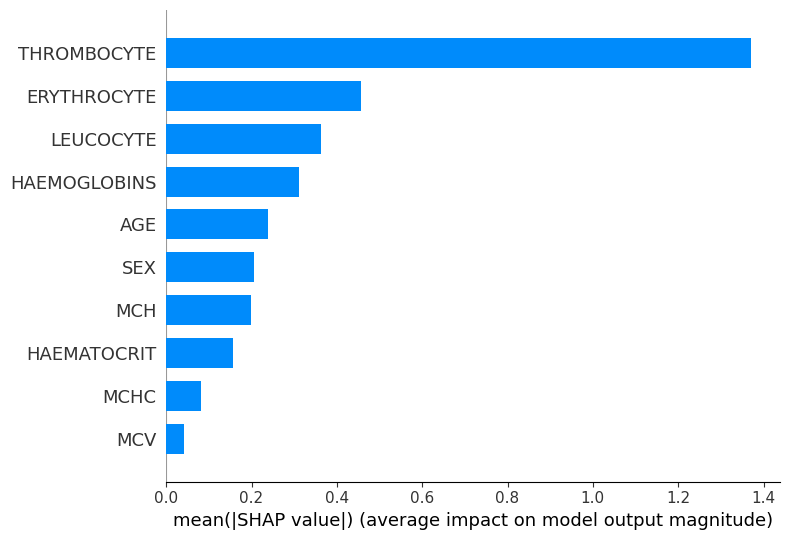

In [ ]:
shap.summary_plot(shap_values, plot_type = 'bar', feature_names = x_train.columns,show=False)

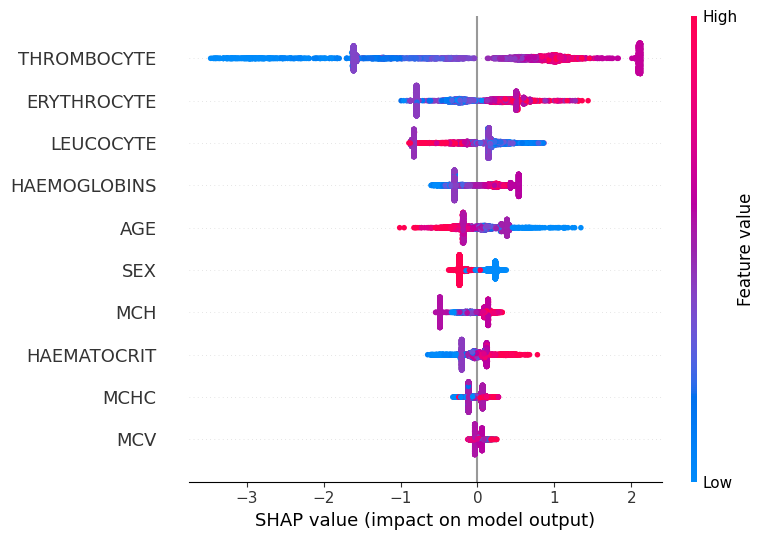

In [ ]:
shap.summary_plot(shap_values, x_train.to_numpy(),feature_names = x_train.columns)

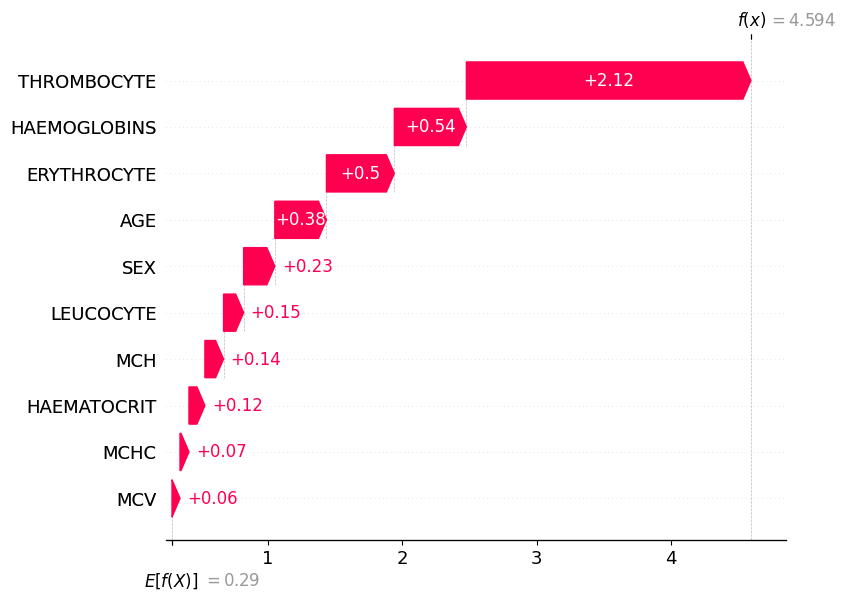

In [ ]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[5], feature_names = x_train.columns)

### Recommendation - 2 (AI Fairness)
As we are creating synthetic data, it is important to make sure that the dataset is not biased towards a specific gender. We observed that sampling without noise produced highly unfair data.

In [ ]:
import pandas as pd
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import DisparateImpactRemover

# Import your dataset
dataset = df_merged

# Create the 'PROTECTED_CLASS' column based on 'SEX'
dataset['PROTECTED_CLASS'] = dataset['SEX'].astype(int)

# Create a StandardDataset for AIF360
privileged_groups = [{'PROTECTED_CLASS': 0}]
unprivileged_groups = [{'PROTECTED_CLASS': 1}]
dataset_aif360 = StandardDataset(
    df=dataset,
    label_name='SOURCE',
    favorable_classes=[1],  # 'In' is considered favorable
    protected_attribute_names=['PROTECTED_CLASS'],
    privileged_classes=[[1]],
)

# Calculate and display the initial disparate impact
privileged_metric = BinaryLabelDatasetMetric(
    dataset_aif360,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups,
)
initial_disparate_impact = privileged_metric.disparate_impact()
print("Initial Disparate Impact:", initial_disparate_impact)

# If bias is detected, you can use the Disparate Impact Remover mitigation technique
di_remover = DisparateImpactRemover(repair_level=0.1)
dataset_transf = di_remover.fit_transform(dataset_aif360)

# Calculate and display the new disparate impact after mitigation
new_privileged_metric = BinaryLabelDatasetMetric(
    dataset_transf,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups,
)
new_disparate_impact = new_privileged_metric.disparate_impact()
print("New Disparate Impact after Mitigation:", new_disparate_impact)

Initial Disparate Impact: 0.8622409003490278
New Disparate Impact after Mitigation: 0.8622409003490278
